In [1]:
!pip install transformers
!pip install torch
!pip install pandas
!pip install scikit-learn


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Ganti dengan path yang sesuai di Google Drive
dataset_path = '/content/drive/MyDrive/IMDB/imdb_reviews.csv'

# Membaca dataset
data = pd.read_csv(dataset_path)
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
from datasets import load_dataset

# Load dataset IMDB dari Hugging Face
dataset = load_dataset('imdb')

# Menampilkan beberapa data
print(dataset['train'][0])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [5]:
from google.colab import auth
auth.authenticate_user()

from huggingface_hub import login
login(token="[REDACTED_HF_TOKEN]")


In [6]:
from transformers import DistilBertTokenizer

# Memuat tokenizer DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Fungsi untuk tokenisasi
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Menerapkan tokenisasi ke dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Menampilkan data tokenized pertama
print(tokenized_datasets['train'][0])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [7]:
# Membagi dataset menjadi train dan test
train_dataset = tokenized_datasets['train']
eval_dataset = tokenized_datasets['test']


In [8]:
from transformers import DistilBertForSequenceClassification, Trainer, TrainingArguments

# Memuat model DistilBERT untuk klasifikasi
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Menyiapkan argumen pelatihan
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Membuat Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset
)

# Melatih model
trainer.train()


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: alzahrareyhan (alzahrareyhan-universitas-negeri-semarang) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.719500
20,0.701800
30,0.689700
40,0.693300
50,0.688500
60,0.676300
70,0.670900
80,0.670500
90,0.606000
100,0.568800


TrainOutput(global_step=4689, training_loss=0.1715346448986254, metrics={'train_runtime': 3623.1694, 'train_samples_per_second': 20.7, 'train_steps_per_second': 1.294, 'total_flos': 9935054899200000.0, 'train_loss': 0.1715346448986254, 'epoch': 3.0})

In [9]:
model.save_pretrained('/content/drive/MyDrive/saved_model')
tokenizer.save_pretrained('/content/drive/MyDrive/saved_model')


('/content/drive/MyDrive/saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/saved_model/vocab.txt',
 '/content/drive/MyDrive/saved_model/added_tokens.json')

In [10]:
# Evaluasi model pada dataset evaluasi (test dataset)
eval_results = trainer.evaluate()

# Menampilkan hasil evaluasi
print(eval_results)


{'eval_loss': 0.28615736961364746, 'eval_runtime': 366.5131, 'eval_samples_per_second': 68.21, 'eval_steps_per_second': 1.067, 'epoch': 3.0}


In [11]:
from sklearn.metrics import classification_report

# Mendapatkan prediksi model pada dataset evaluasi
predictions = trainer.predict(eval_dataset)

# Prediksi kelas dan label asli
pred_labels = predictions.predictions.argmax(axis=-1)
true_labels = predictions.label_ids

# Metrik tambahan: Precision, Recall, F1-score
report = classification_report(true_labels, pred_labels, target_names=['negative', 'positive'])
print(report)


              precision    recall  f1-score   support

    negative       0.93      0.93      0.93     12500
    positive       0.93      0.94      0.93     12500

    accuracy                           0.93     25000
   macro avg       0.93      0.93      0.93     25000
weighted avg       0.93      0.93      0.93     25000



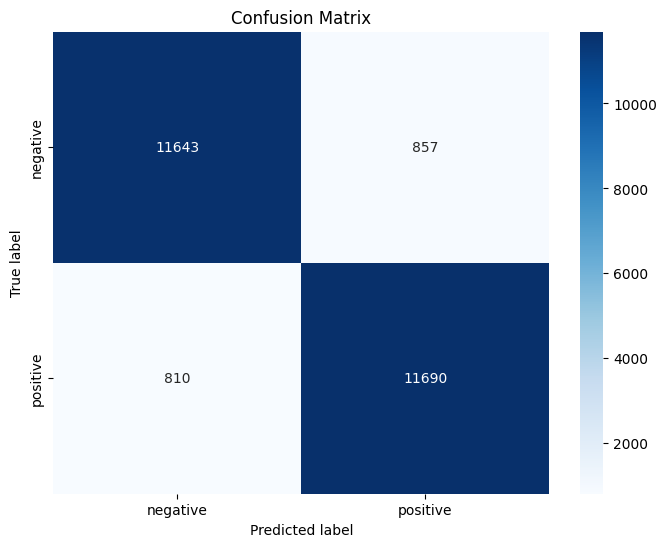

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


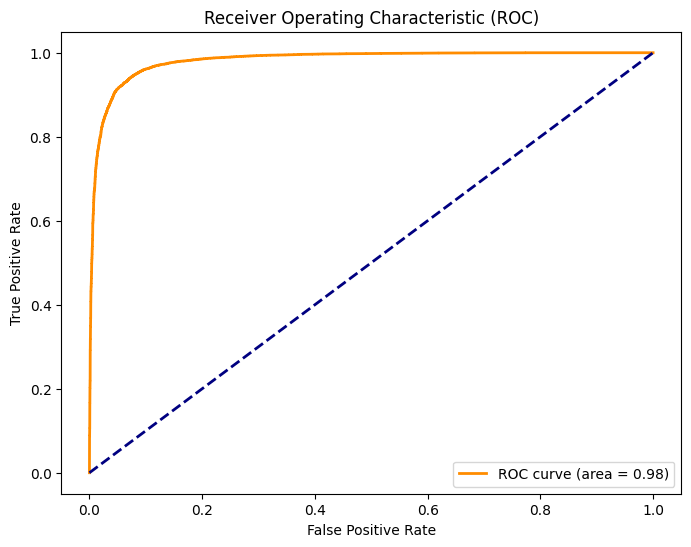

In [13]:
from sklearn.metrics import roc_curve, auc

# Menghitung ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predictions.predictions[:, 1])
roc_auc = auc(fpr, tpr)

# Visualisasi ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [16]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 27.7 MB/s eta 0:00:00


In [21]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")


Using device: cuda


In [26]:
model.save_pretrained('/content/drive/MyDrive/IMDB/saved_model')
tokenizer.save_pretrained('/content/drive/MyDrive/IMDB/saved_model')


('/content/drive/MyDrive/IMDB/saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/IMDB/saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/IMDB/saved_model/vocab.txt',
 '/content/drive/MyDrive/IMDB/saved_model/added_tokens.json')

In [28]:
model_path = '/content/drive/MyDrive/IMDB/saved_model'

In [29]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_path = '/content/drive/MyDrive/IMDB/saved_model'  # Path ke folder model di Drive atau lokal

# Memuat model dan tokenizer dari folder lokal
model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_path)


In [30]:
import os
model_path = '/content/drive/MyDrive/IMDB/saved_model'  # Path yang sesuai
print(os.listdir(model_path))  # Menampilkan daftar file di folder model


['config.json', 'model.safetensors', 'tokenizer_config.json', 'special_tokens_map.json', 'vocab.txt']


In [31]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer

model_name = 'distilbert-base-uncased'  # Atau identifier model yang sesuai dari Hugging Face Hub

model = DistilBertForSequenceClassification.from_pretrained(model_name)
tokenizer = DistilBertTokenizer.from_pretrained(model_name)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
from datasets import load_dataset

# Memuat dataset IMDB untuk evaluasi
dataset = load_dataset('imdb')

# Memeriksa contoh data evaluasi
eval_dataset = dataset['test']
print(eval_dataset[0])


{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [35]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel
from datasets import load_dataset

# Memeriksa perangkat yang tersedia (GPU jika ada, CPU jika tidak)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Path ke folder model yang telah disimpan
model_path = '/content/drive/MyDrive/IMDB/saved_model'  # Sesuaikan dengan path model Anda

# Memuat model DistilBERT untuk mendapatkan embedding (bukan untuk klasifikasi)
model = DistilBertModel.from_pretrained(model_path)
tokenizer = DistilBertTokenizer.from_pretrained(model_path)

# Memindahkan model ke perangkat yang sesuai (GPU atau CPU)
model.to(device)

# Memuat dataset (contoh menggunakan IMDB)
dataset = load_dataset('imdb')

# Mengambil contoh teks dari dataset evaluasi
eval_dataset = dataset['test']
sample_texts = eval_dataset['text'][:5]  # Mengambil 5 contoh teks pertama

# Fungsi untuk mendapatkan embedding
def get_embeddings(texts):
    inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt")
    # Memindahkan tensor input ke perangkat yang sama dengan model
    inputs = {key: value.to(device) for key, value in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)  # Menggunakan DistilBERT layer untuk embeddings
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Rata-rata embedding untuk setiap kalimat
    return embeddings

# Mendapatkan embedding untuk teks
embeddings = get_embeddings(sample_texts)

# Menampilkan shape dari embedding
print(embeddings.shape)  # Output: [5, 768] (5 kalimat, 768 dimensi embedding)


Using device: cuda
torch.Size([5, 768])


In [37]:
import faiss
import numpy as np

# Mengonversi embeddings menjadi numpy array
embedding_array = embeddings.cpu().numpy()

# Membuat index FAISS untuk pencarian nearest neighbor
index = faiss.IndexFlatL2(embedding_array.shape[1])  # L2 distance (Euclidean)
index.add(embedding_array)  # Menambahkan embeddings ke index FAISS

# Mencari 3 tetangga terdekat
D, I = index.search(embedding_array, k=3)  # mencari 3 tetangga terdekat

# Menampilkan hasil
print("Nearest neighbors (indices):", I)
print("Distances:", D)


Nearest neighbors (indices): [[0 2 1]
 [1 3 0]
 [2 0 1]
 [3 1 0]
 [4 3 1]]
Distances: [[  0.        21.490496  22.051426]
 [  0.        20.637943  22.051426]
 [  0.        21.490496  34.205784]
 [  0.        20.637943  28.631706]
 [  0.       259.99622  291.78195 ]]


In [39]:
from sklearn.cluster import KMeans

# Menggunakan KMeans untuk melakukan clustering pada embeddings
kmeans = KMeans(n_clusters=2, random_state=0).fit(embedding_array)

# Menampilkan hasil clustering
print("Cluster labels:", kmeans.labels_)


Cluster labels: [0 0 0 0 1]


In [41]:
# Menampilkan kalimat yang terkait dengan indeks terdekat
for i in range(len(sample_texts)):
    print(f"Query sentence: {sample_texts[i]}")
    print("Nearest neighbors:")
    for j in I[i]:  # I[i] berisi indeks tetangga terdekat
        # Pastikan `j` adalah tipe int
        print(f"- {eval_dataset['text'][int(j)]}")  # Konversi j ke int jika perlu
    print("-" * 80)


Query sentence: I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as th

In [42]:
from sklearn.cluster import KMeans

# Menggunakan KMeans untuk melakukan clustering pada embeddings
kmeans = KMeans(n_clusters=2, random_state=0).fit(embedding_array)

# Menampilkan hasil clustering
print("Cluster labels:", kmeans.labels_)


Cluster labels: [0 0 0 0 1]


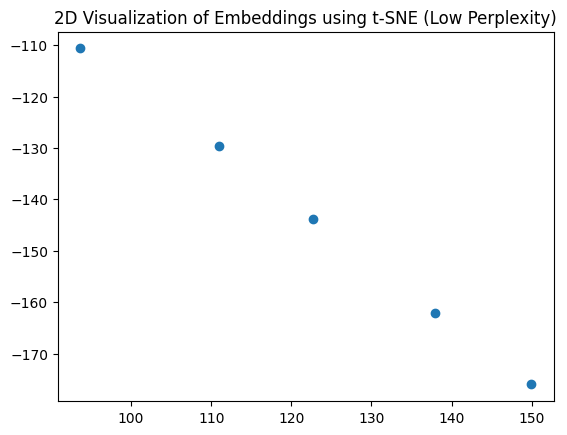

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Menggunakan t-SNE dengan perplexity yang lebih rendah
tsne = TSNE(n_components=2, perplexity=2, random_state=0)  # Perplexity lebih kecil
reduced_embeddings_tsne = tsne.fit_transform(embedding_array)

# Visualisasi dengan t-SNE
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])
plt.title("2D Visualization of Embeddings using t-SNE (Low Perplexity)")
plt.show()


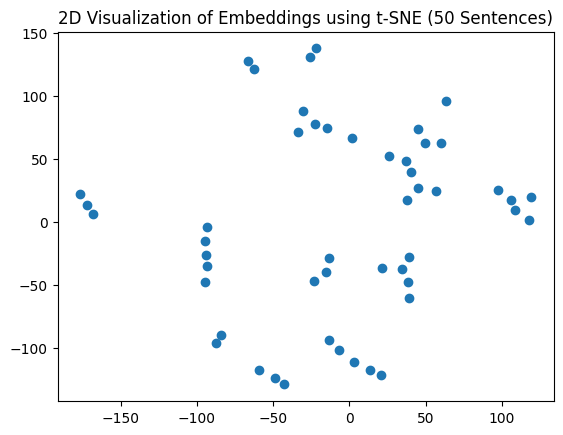

In [46]:
sample_texts = eval_dataset['text'][:50]  # Mengambil 50 kalimat pertama dari dataset

# Mendapatkan embedding untuk 50 kalimat
embeddings = get_embeddings(sample_texts)

# Menggunakan t-SNE untuk mereduksi dimensi
reduced_embeddings_tsne = tsne.fit_transform(embeddings.cpu().numpy())

# Visualisasi
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])
plt.title("2D Visualization of Embeddings using t-SNE (50 Sentences)")
plt.show()
